In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"]=15,10

## Importamos los datos necesarios y motramos los ultimos datos de las 16 comunas

In [6]:
url          = "data.tsv"
data         = pd.read_csv(url, sep='\t')
data["date"] = pd.to_datetime(data["date"], format='%Y-%m-%d')
data.tail(16)

,date,location,new_cases,total_cases
688,2020-04-15,Arica y Parinacota,4,124
689,2020-04-15,Tarapacá,0,62
690,2020-04-15,Antofagasta,21,176
691,2020-04-15,Atacama,0,13
692,2020-04-15,Coquimbo,0,66
693,2020-04-15,Valparaíso,14,299
694,2020-04-15,Metropolitana,248,4334
695,2020-04-15,O'Higgins,1,54
696,2020-04-15,Maule,10,152
697,2020-04-15,Ñuble,12,634


## Casos de contagios por día en el pais 

In [7]:
contagiados_por_fecha = data.groupby(['date'])['new_cases'].sum()
contagiados_por_fecha

date
2020-03-03      1
2020-03-04      2
2020-03-05      1
2020-03-06      1
2020-03-07      2
2020-03-08      3
2020-03-09      3
2020-03-10      4
2020-03-11      6
2020-03-12     10
2020-03-13     10
2020-03-14     18
2020-03-15     14
2020-03-16     81
2020-03-17     45
2020-03-18     37
2020-03-19    104
2020-03-20     92
2020-03-21    103
2020-03-22     95
2020-03-23    114
2020-03-24    176
2020-03-25    220
2020-03-26    164
2020-03-27    304
2020-03-28    299
2020-03-29    230
2020-03-30    310
2020-03-31    289
2020-04-01    293
2020-04-02    373
2020-04-03    332
2020-04-04    424
2020-04-05    310
2020-04-06    344
2020-04-07    301
2020-04-08    430
2020-04-09    426
2020-04-10    529
2020-04-11    426
2020-04-12    286
2020-04-13    312
2020-04-14    392
2020-04-15    356
Name: new_cases, dtype: int64

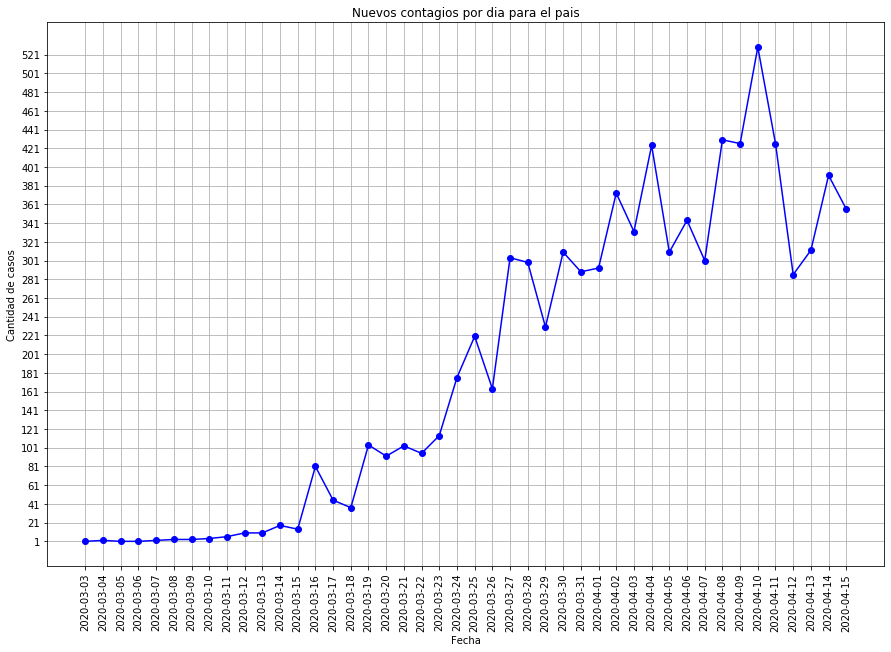

In [8]:
df_contagiados_por_fecha =  contagiados_por_fecha.to_frame().reset_index()
X                        =  df_contagiados_por_fecha["date"]
Y                        =  df_contagiados_por_fecha["new_cases"]

plt.plot(X,Y, "bo")
plt.plot(X,Y, 'b')
plt.xlabel('Fecha')
plt.ylabel('Cantidad de casos')
plt.title("Nuevos contagios por dia para el pais")
plt.xticks(X, rotation='vertical')
plt.yticks(np.arange(min(Y), max(Y)+1, 20))
plt.grid()
plt.show()

## Nuevos casos de contagio por región 

In [9]:
contagios_por_fecha_region = data.groupby(['date', 'location'], as_index=False)['new_cases'].sum()
contagios_por_fecha_region.tail(16)

,date,location,new_cases
688,2020-04-15,Antofagasta,21
689,2020-04-15,Araucanía,10
690,2020-04-15,Arica y Parinacota,4
691,2020-04-15,Atacama,0
692,2020-04-15,Aysén,0
693,2020-04-15,Biobío,14
694,2020-04-15,Coquimbo,0
695,2020-04-15,Los Lagos,5
696,2020-04-15,Los Ríos,2
697,2020-04-15,Magallanes,15


In [10]:
def getGraphandList(name_region, scale):
    region = contagios_por_fecha_region.loc[contagios_por_fecha_region['location'] == name_region]
    
    plt.plot(region["date"],region["new_cases"], "bo")
    plt.plot(region["date"],region["new_cases"], 'b')
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de casos')
    plt.title("Curva de crecimiento - " + str(name_region))
    plt.xticks(region["date"].values, rotation='vertical')
    plt.yticks(np.arange(min(region["new_cases"].values), max(region["new_cases"].values)+1, scale))
    plt.grid()
    plt.show()


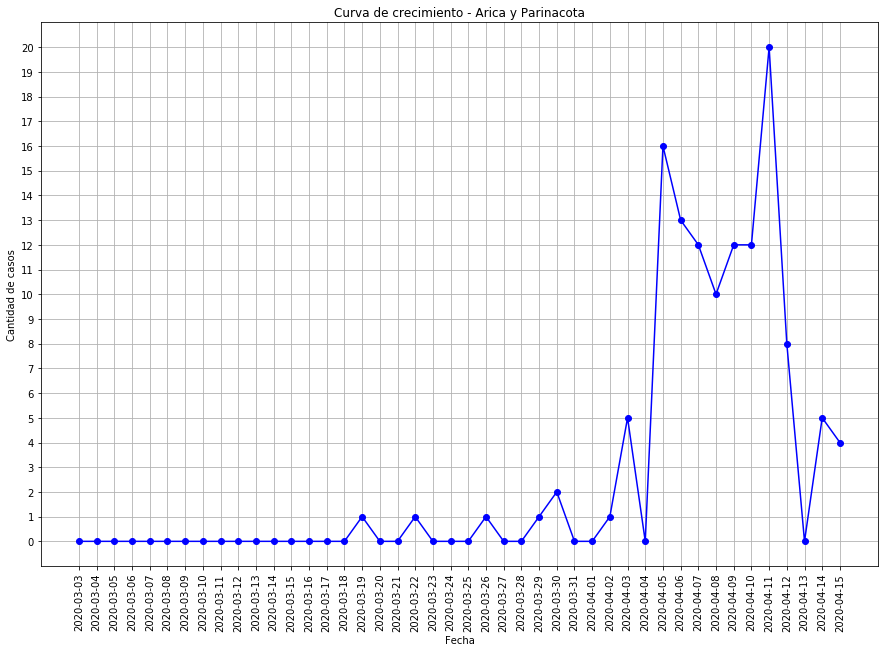

In [11]:
getGraphandList("Arica y Parinacota", 1)

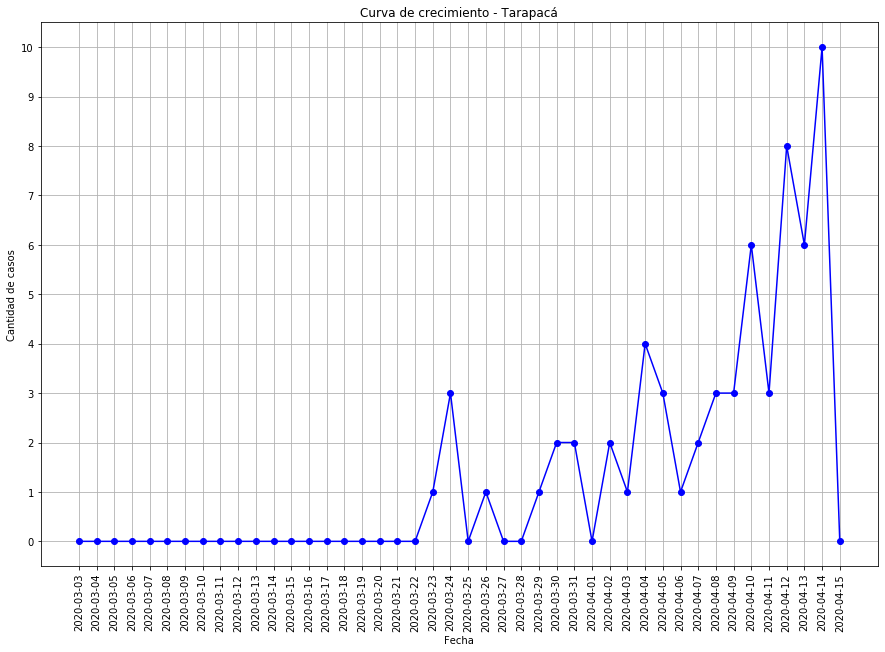

In [12]:
getGraphandList("Tarapacá", 1)

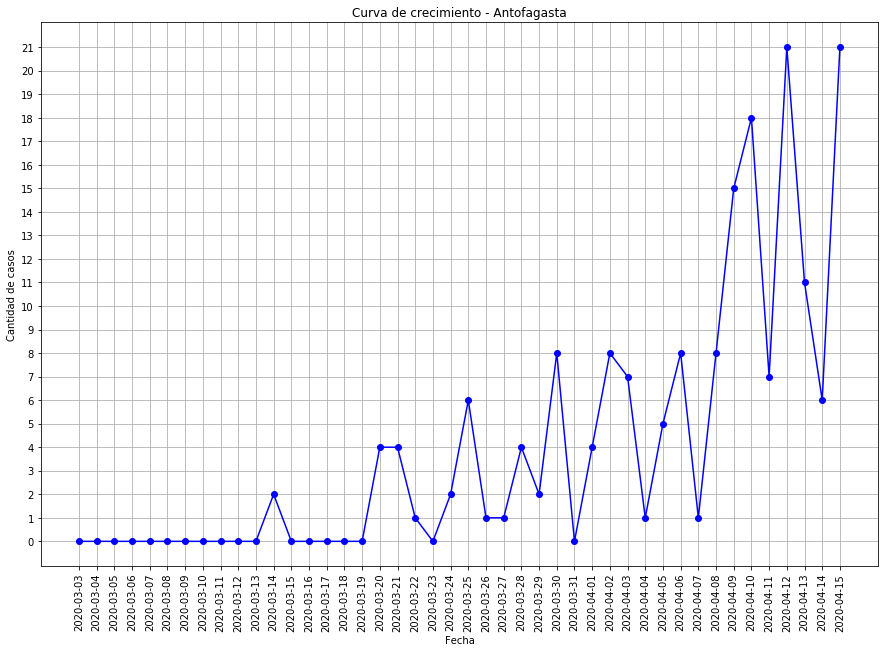

In [13]:
getGraphandList("Antofagasta", 1)

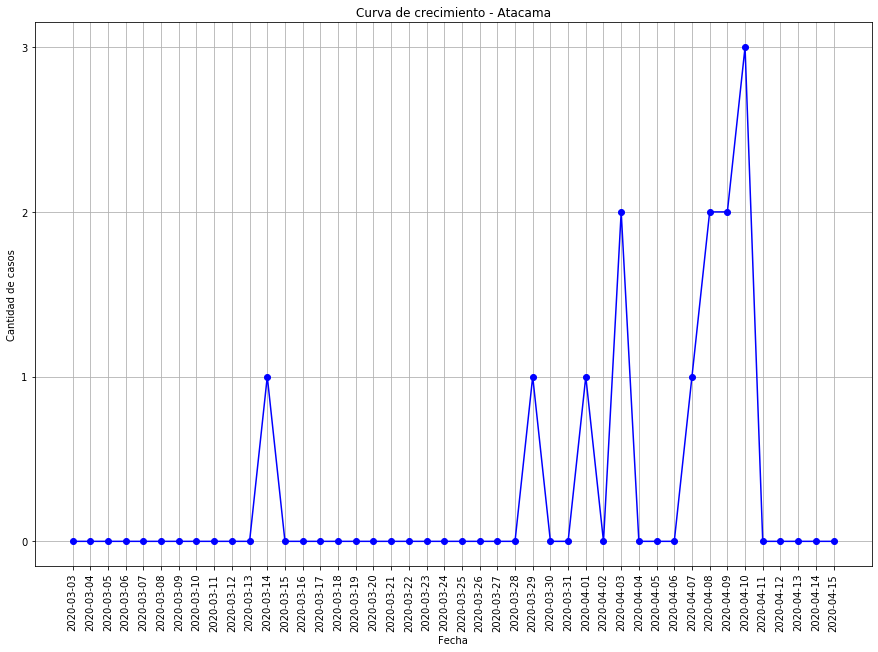

In [14]:
getGraphandList("Atacama", 1)

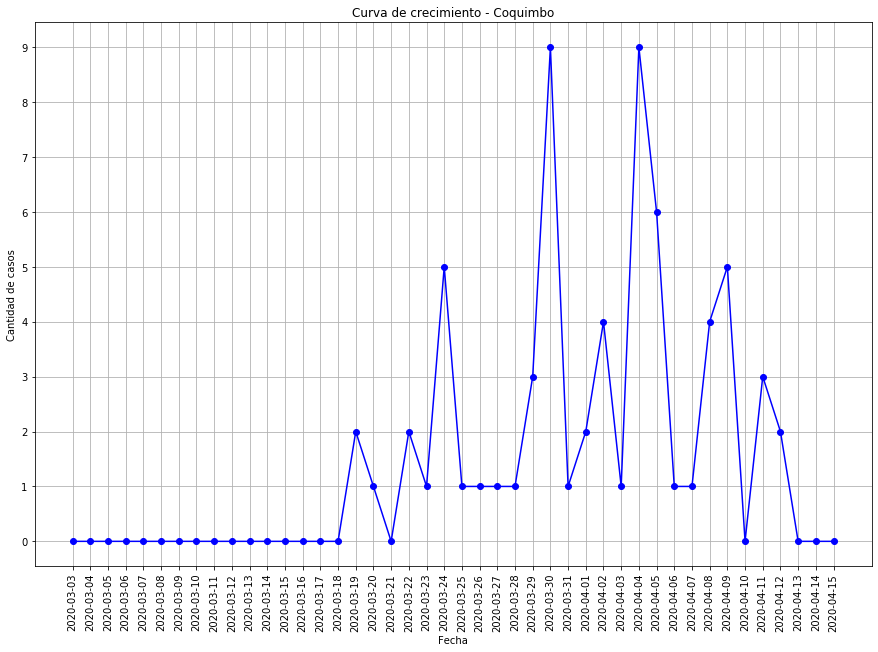

In [15]:
getGraphandList("Coquimbo", 1)

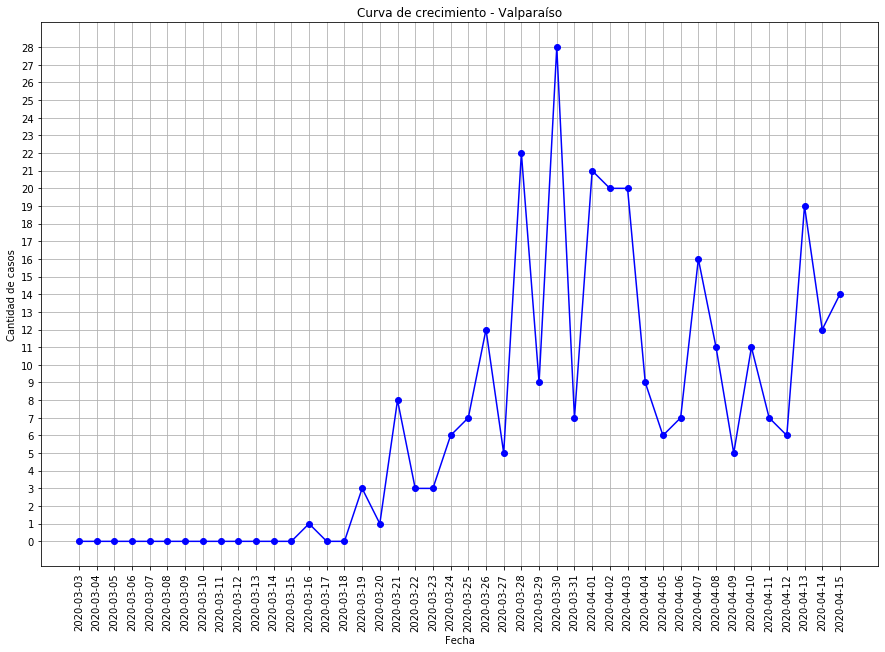

In [16]:
getGraphandList("Valparaíso", 1)

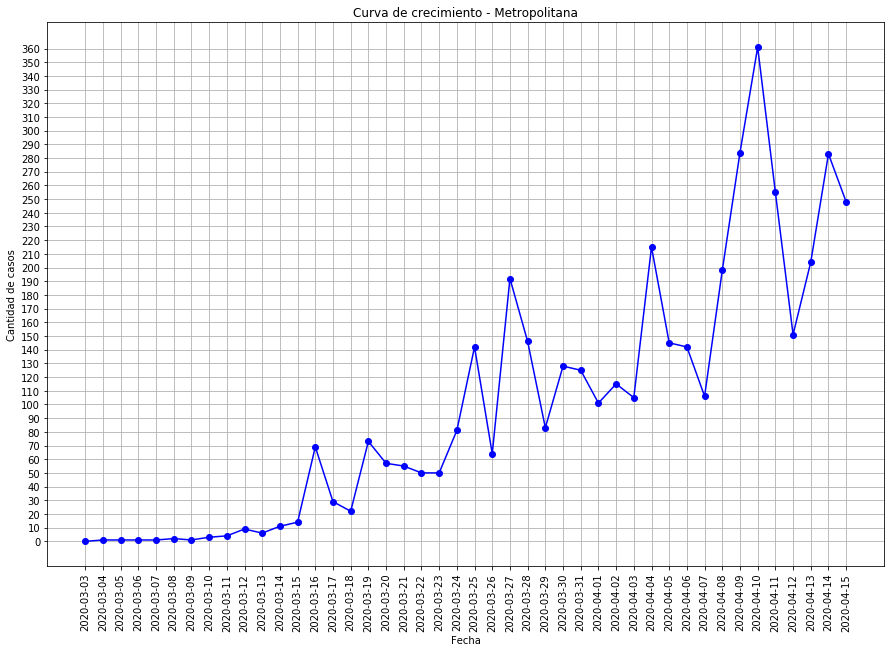

In [17]:
getGraphandList("Metropolitana", 10)

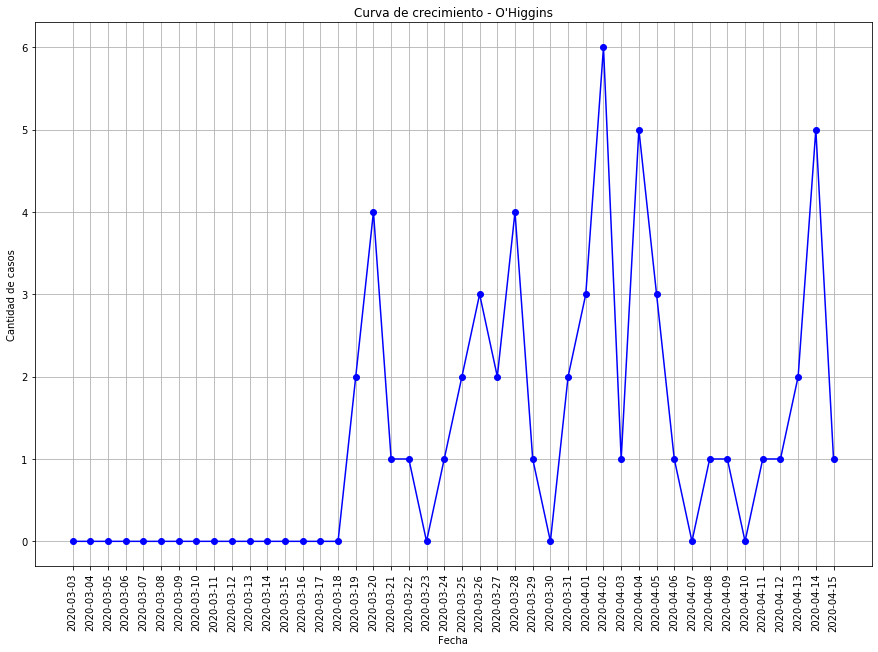

In [18]:
getGraphandList("O'Higgins", 1)

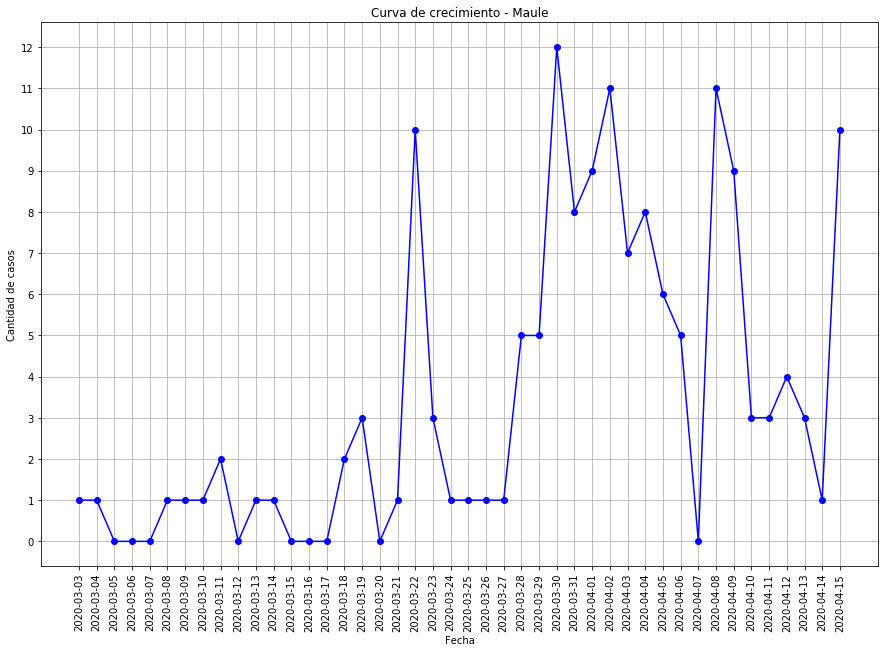

In [19]:
getGraphandList("Maule", 1)

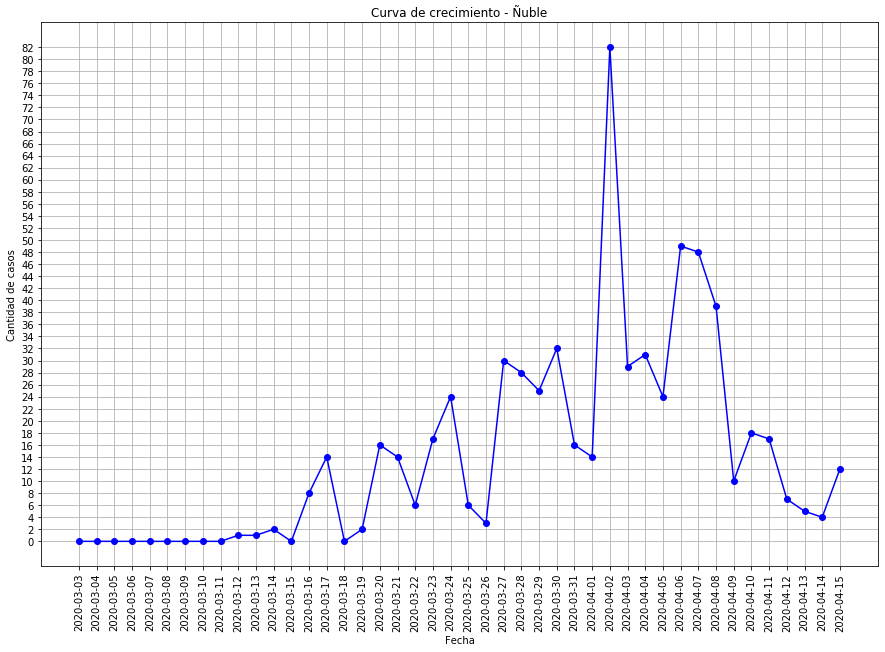

In [20]:
getGraphandList("Ñuble", 2)

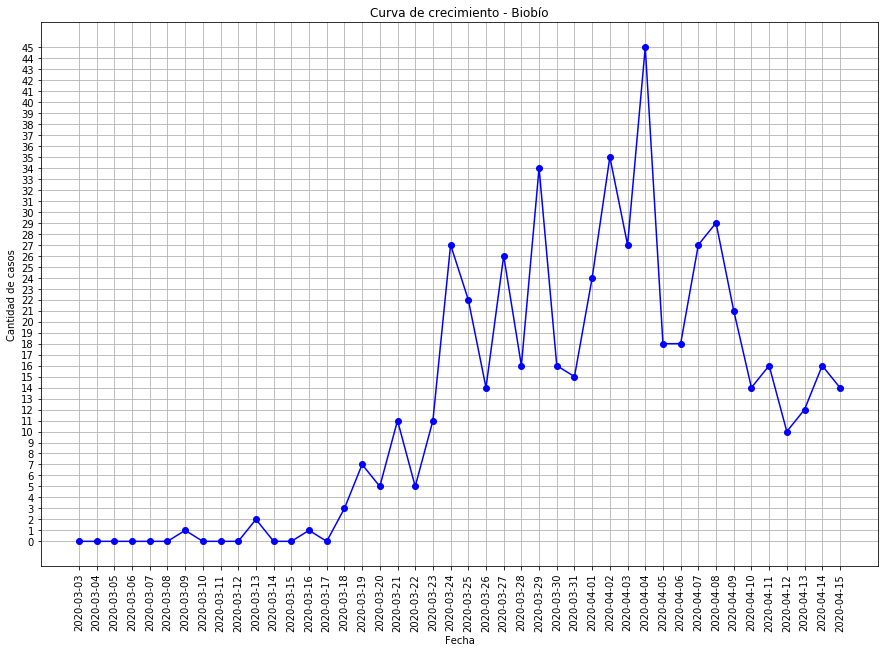

In [21]:
getGraphandList("Biobío", 1)

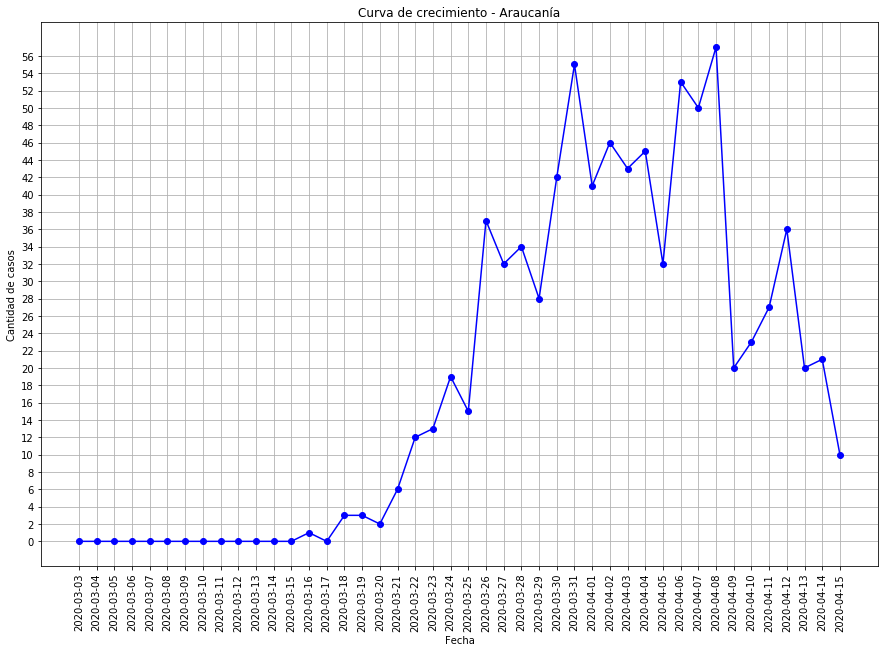

In [22]:
getGraphandList("Araucanía",2)

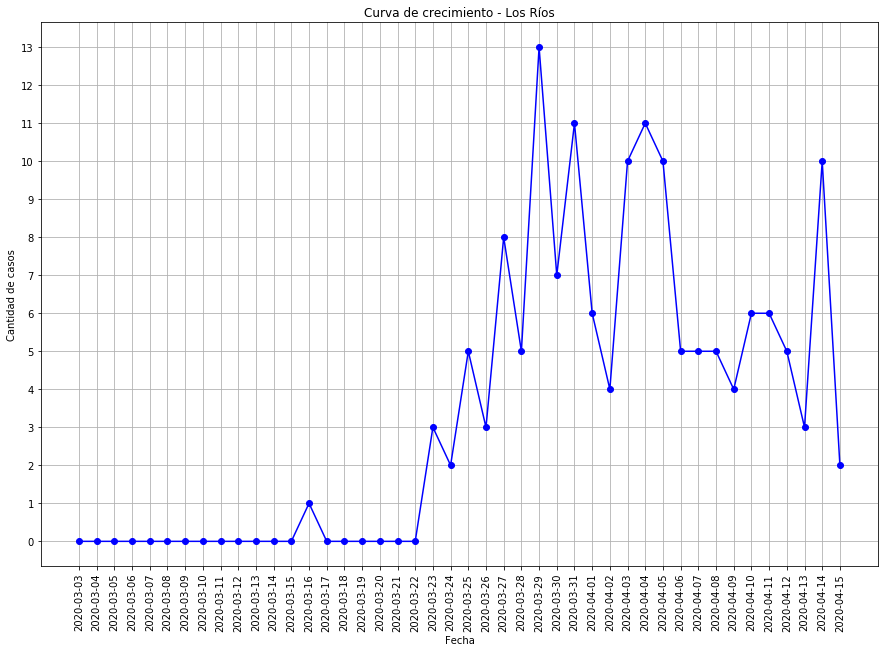

In [23]:
getGraphandList("Los Ríos", 1)

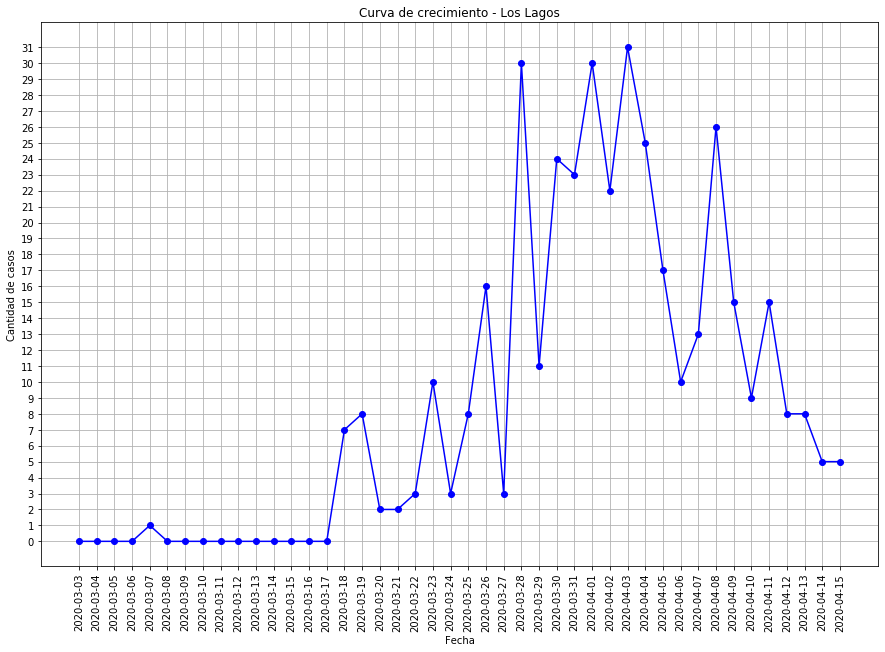

In [24]:
getGraphandList("Los Lagos", 1)

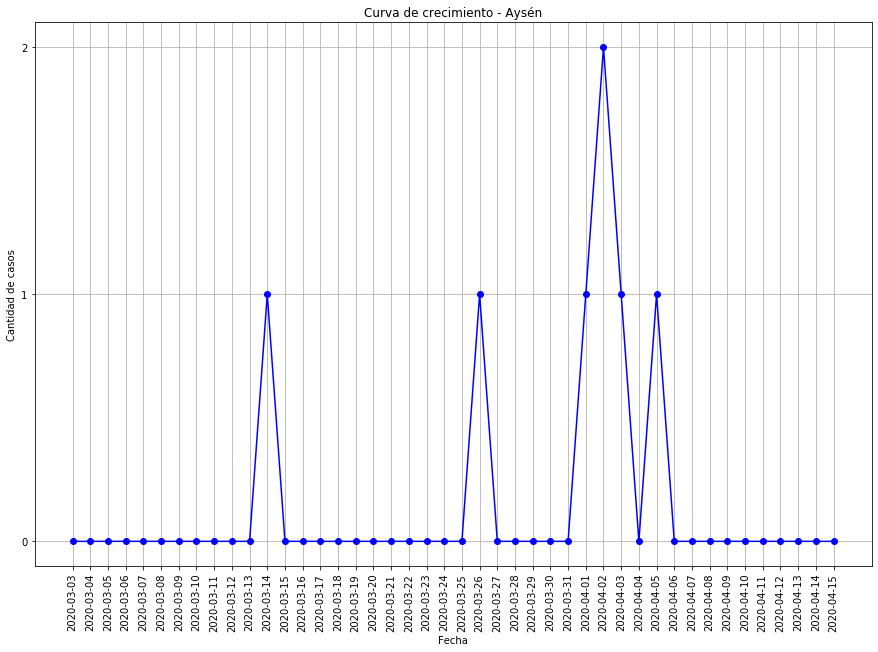

In [25]:
getGraphandList("Aysén", 1)

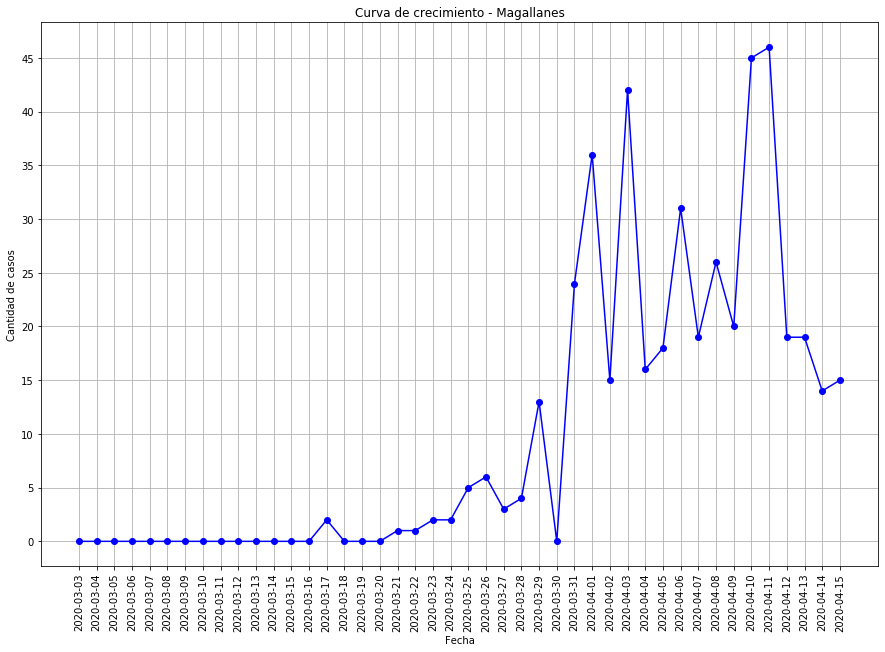

In [28]:
getGraphandList("Magallanes", 5)

In [29]:
colors = ['#f15656', '#f18e56', '#f1c956', '#bdf156', '#74f367', '#67f3b3', '#67e6f3', '#67a9f3', '#6772f3', '#9167f3', '#de67f3', '#f367c9', '#f36789', '#1c306a', "#1c6a20", "#2c6a40"]
def getGraphandListall():
    icolor = 0
    name_regiones = contagios_por_fecha_region["location"].unique()
    
    for nregion in name_regiones:
        region           = contagios_por_fecha_region.loc[contagios_por_fecha_region['location'] == nregion]
        color            = colors[icolor]
        plt.plot(region["date"],region["new_cases"], color)
        icolor += 1
        
    plt.xlabel('Fecha')
    plt.ylabel('Cantidad de nuevo casos')
    plt.title('Curva de crecimiento por región')
    plt.legend(name_regiones, loc = 'best', bbox_to_anchor=(1.0, 1.0))
    plt.show()

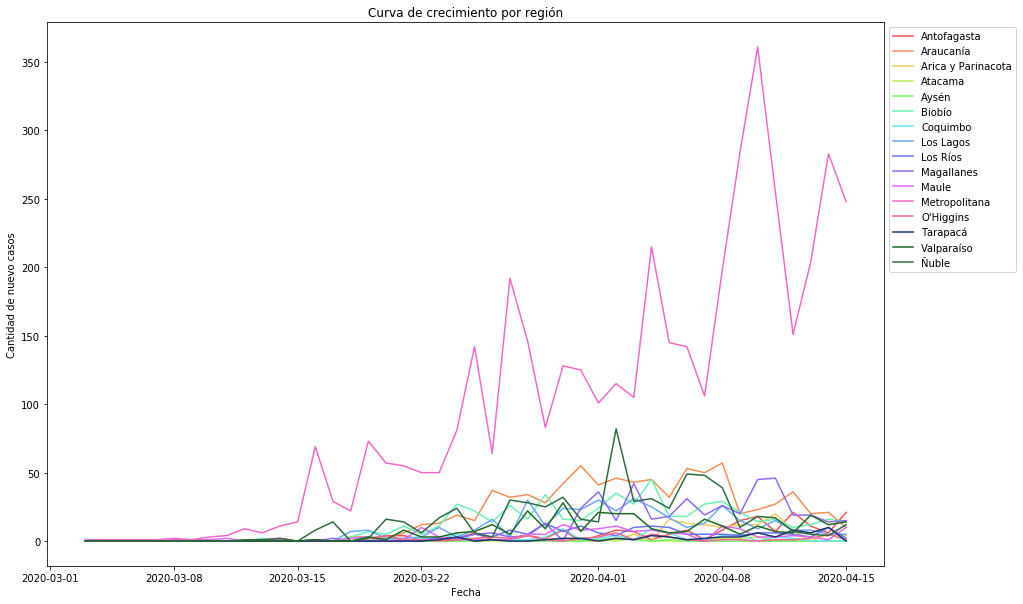

In [30]:
getGraphandListall()